In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report




In [49]:
# loading Bank data 

bank = pd.read_csv("bank.csv")




In [50]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [51]:
df=pd.DataFrame(bank)

In [52]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [53]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

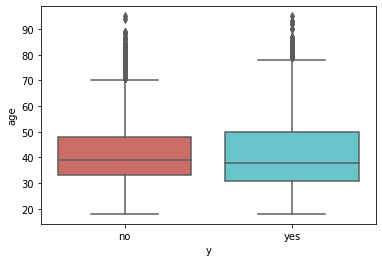

In [54]:
sb.boxplot(x="y",y="age",data=df,palette="hls")


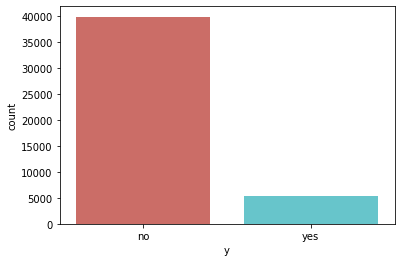

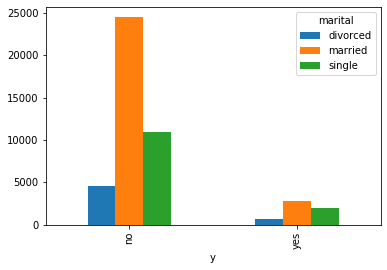

In [55]:
# Getting the barplot for the categorical columns 

sb.countplot(x="y",data=df,palette="hls")
pd.crosstab(df.y,df.marital).plot(kind="bar")



In [56]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [57]:
# create dummies for job Column
dummies = pd.get_dummies(df['job']).rename(columns=lambda x: 'job_' + str(x))
# bring the dummies back into the original dataset
df = pd.concat([df, dummies], axis=1)


In [58]:
# create dummies for marital Column
dummies = pd.get_dummies(df['marital']).rename(columns=lambda x: 'marital_' + str(x))
# bring the dummies back into the original dataset
df = pd.concat([df, dummies], axis=1)


In [59]:
# create dummies for education Column
dummies = pd.get_dummies(df['education']).rename(columns=lambda x: 'education_' + str(x))
# bring the dummies back into the original dataset
df = pd.concat([df, dummies], axis=1)


In [60]:
# create dummies for default Column
dummies = pd.get_dummies(df['default']).rename(columns=lambda x: 'default_' + str(x))
# bring the dummies back into the original dataset
df = pd.concat([df, dummies], axis=1)


In [61]:
# create dummies for housing Column
dummies = pd.get_dummies(df['housing']).rename(columns=lambda x: 'housing_' + str(x))
# bring the dummies back into the original dataset
df = pd.concat([df, dummies], axis=1)


In [62]:
# create dummies for loan Column
dummies = pd.get_dummies(df['loan']).rename(columns=lambda x: 'loan_' + str(x))
# bring the dummies back into the original dataset
df = pd.concat([df, dummies], axis=1)


In [63]:
# create dummies for contact Column
dummies = pd.get_dummies(df['contact']).rename(columns=lambda x: 'contact_' + str(x))
# bring the dummies back into the original dataset
df = pd.concat([df, dummies], axis=1)


In [64]:
# create dummies for month Column
dummies = pd.get_dummies(df['month']).rename(columns=lambda x: 'month_' + str(x))
# bring the dummies back into the original dataset
df = pd.concat([df, dummies], axis=1)


In [65]:
# create dummies for poutcome Column
dummies = pd.get_dummies(df['poutcome']).rename(columns=lambda x: 'poutcome_' + str(x))
# bring the dummies back into the original dataset
df = pd.concat([df, dummies], axis=1)


In [66]:
row_indexes=df[df['y']=="yes"].index

In [67]:
df.loc[row_indexes,'output']=1

In [68]:
row_indexes=df[df['y']=="no"].index

In [69]:
df.loc[row_indexes,'output']=0

In [70]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,output
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,1,0,0,0,0,0,0,1,0.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,1,0,0,0,0,0,0,1,0.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,1,0,0,0,0,0,0,1,0.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,1,0,0,0,0,0,0,1,0.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,1,0,0,0,0,0,0,1,0.0


In [71]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'output']

In [72]:
df.drop(df.columns[1:5], axis=1, inplace=True)

In [73]:
df.columns

Index(['age', 'balance', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'output'],
      dtype='object')

In [74]:
df.drop(df.columns[2:5], axis=1, inplace=True)

In [75]:
df.columns

Index(['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'output'],
      dtype='object')

In [76]:
df = df.drop('month', 1)

In [77]:
df = df.drop('poutcome', 1)

In [78]:
df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'output'],
      dtype='object')

In [79]:
df.shape

(45211, 53)

In [80]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,output
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.114375,0.215257,0.032890,...,0.010551,0.304483,0.087810,0.016323,0.012807,0.108403,0.040698,0.033421,0.817478,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.318269,0.411005,0.178351,...,0.102174,0.460193,0.283022,0.126718,0.112441,0.310892,0.197592,0.179735,0.386278,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
df=df.drop("y",1)

In [85]:
# Model building 
from sklearn.linear_model import LogisticRegression

df.shape
X = df.iloc[:,0:51]


In [86]:
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [89]:
Y = df.iloc[:,51]

In [90]:
Y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
45206    1.0
45207    1.0
45208    1.0
45209    0.0
45210    0.0
Name: output, Length: 45211, dtype: float64

In [91]:
classifier = LogisticRegression()
classifier.fit(X,Y)


C:\Users\anilkrishna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
classifier.coef_ # coefficients of features 

array([[-3.32803997e-03,  1.41867460e-05,  7.68902742e-03,
         4.13899177e-03, -9.24450412e-02, -2.09974940e-05,
         1.97683680e-02,  5.60489860e-02, -2.21715704e-01,
        -2.84516917e-01, -3.32606703e-01, -8.55025917e-02,
         3.86497940e-01, -2.38593858e-01, -1.64614922e-01,
         4.36812975e-01, -8.04924512e-02, -1.19830184e-01,
        -8.62672041e-02, -1.63499075e-01, -3.90650651e-01,
        -1.80630911e-01, -3.76451187e-01, -2.15103101e-01,
        -1.45164244e-02, -1.28709924e-01, -4.19937048e-01,
        -3.14843588e-01, -4.06705020e-02, -6.94110134e-01,
        -1.69473376e-01, -5.65307260e-01,  3.48892835e-01,
         1.93532671e-01, -1.27720614e+00, -7.44235927e-02,
        -7.44773185e-01,  3.55155739e-01, -2.50767308e-01,
        -1.12842693e+00, -8.85909025e-01,  3.83469078e-01,
         1.40496659e+00, -4.74283926e-01, -9.40614732e-01,
         8.64425204e-01,  7.56401449e-01, -7.26971652e-01,
        -6.01942266e-01,  1.40458820e+00, -8.10454919e-0

In [93]:
classifier.predict_proba (X) # Probability values 

array([[0.98533101, 0.01466899],
       [0.99035368, 0.00964632],
       [0.99671652, 0.00328348],
       ...,
       [0.03050807, 0.96949193],
       [0.887607  , 0.112393  ],
       [0.86718338, 0.13281662]])

In [95]:
y_pred = classifier.predict(X)
df["y_pred"] = y_pred
#y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
#new_df = pd.concat([claimants,y_prob],axis=1)


In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)


[[38981   941]
 [ 3500  1789]]


In [98]:
type(y_pred)
accuracy = sum(Y==y_pred)/df.shape[0]


In [99]:
pd.crosstab(y_pred,Y)

output,0.0,1.0
row_0,,
0.0,38981,3500
1.0,941,1789


In [101]:
accuracy

0.9017716927296454